### graph on montly price of  1-3 Month U.S. Treasury Bills (T-Bills) and the interest rates in U.S.

C:\Users\aianau\AppData\Local\Temp\ipykernel_10812\1711126214.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample("M").mean()  # Ensure monthly data


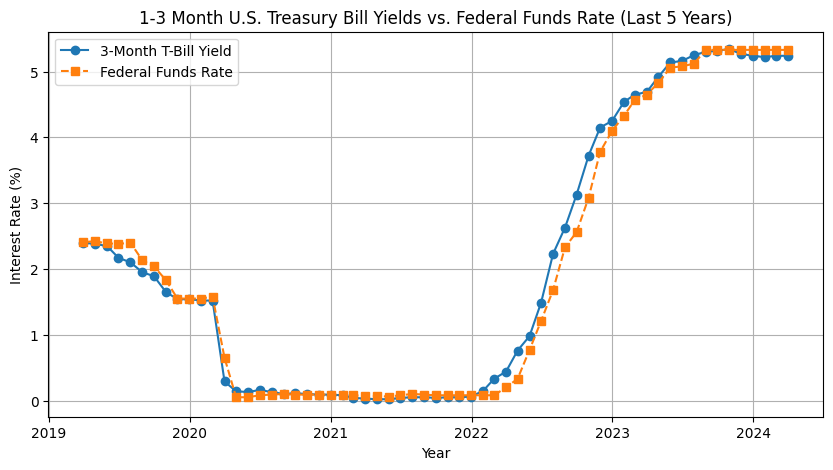

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import os
from dotenv import load_dotenv

load_dotenv()

# Replace with your actual FRED API Key
API_KEY = os.getenv('FRED_API_KEY')
fred = Fred(api_key=API_KEY)

# Fetch data from FRED
start_date = "2019-03-01"  # Start 5 years ago
end_date = "2024-03-01"    # End date

# 3-Month Treasury Bill Yield (Secondary Market Rate)
t_bill = fred.get_series("TB3MS", start_date, end_date)

# Federal Funds Rate
fed_funds = fred.get_series("FEDFUNDS", start_date, end_date)

# Convert to DataFrame and resample monthly
df = pd.DataFrame({"T-Bill (3M Yield)": t_bill, "Fed Funds Rate": fed_funds})
df = df.resample("M").mean()  # Ensure monthly data

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["T-Bill (3M Yield)"], label="3-Month T-Bill Yield", linestyle='-', marker='o')
plt.plot(df.index, df["Fed Funds Rate"], label="Federal Funds Rate", linestyle='--', marker='s')

# Formatting
plt.xlabel("Year")
plt.ylabel("Interest Rate (%)")
plt.title("1-3 Month U.S. Treasury Bill Yields vs. Federal Funds Rate (Last 5 Years)")
plt.legend()
plt.grid(True)
plt.show()
